In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import TimeTagger
from IPython import display
from IPython.display import clear_output
from TimeTagger import createTimeTagger, Combiner, Coincidence, Counter, Countrate, Correlation, TimeDifferences, TimeTagStream, Scope, Event, CHANNEL_UNUSED, UNKNOWN, LOW, HIGH

In [2]:
tagger = createTimeTagger()
tagger.reset()

In [3]:
cw = 1000 # ps
coinc = Coincidence(tagger, [1, 2], cw)
coinc_channel = coinc.getChannel()
print(f'\nCoincidence is assigned to virtual channel {coinc_channel}.')


Coincidence is assigned to virtual channel 9.


In [4]:
# measure average countrate in counts per second on all channels
cr = Counter(tagger, [1, 2, coinc_channel],100000000000,50)
time.sleep(1.0) # collect data for 1 s
cr_data = cr.getData()
cr1 = cr_data[0]
cr2 = cr_data[1]
cr_coinc = cr_data[2]

# display the countrates
print(f'\nCounts on channel 1 is {(cr1)} cps.')
print(f'Counts on channel 2 is {(cr2)} cps.')
print(f'\nCounts on coincidence channel is {(cr_coinc)} cps.')


Counts on channel 1 is [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 79390 79248 79863 80066 79557 79458 79292 79548
 79470 79236] cps.
Counts on channel 2 is [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 26181 26012 26036 25971 25990 25989 26076 26065
 25993 26132] cps.

Counts on coincidence channel is [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 41 65 41 36 37 40 46
 55 39] cps.


In [5]:
cr_data

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 79390, 79248, 79863, 80066, 79557,
        79458, 79292, 79548, 79470, 79236],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 26181, 26012, 26036, 25971, 25990,
        25989, 26076, 26065, 25993, 26132],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

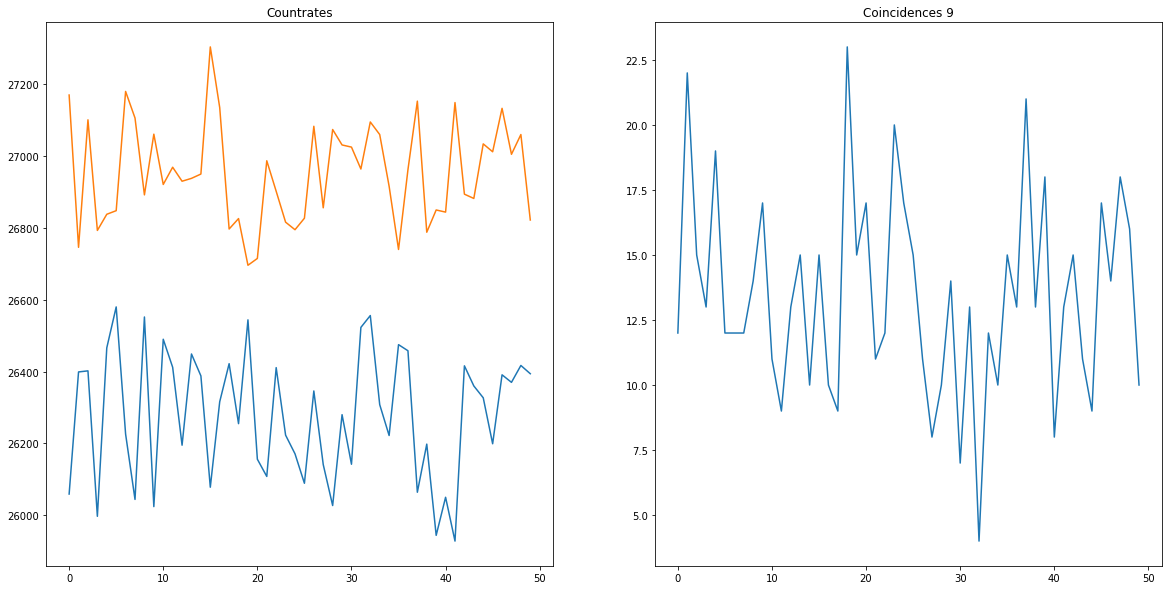

In [10]:
tim=[]
fig, ax = plt.subplots(1,2,figsize= (20,10))

for i in range(0,10):
    
    time.sleep(0.5)
    cr_data = cr.getData()
    ax[0].cla()
    a=(cr_data[0])
    b=(cr_data[1])
    c=(cr_data[2])
    plt.cla()
    #ax[0].plot(a[-50:])
    tim.append(i)
    #ax[0].plot(tim[-50:],a[-50:])
    #ax[0].plot(tim[-50:],b[-50:])
    ax[0].title.set_text('Countrates')
    ax[1].title.set_text(f'Coincidences {i}')
    ax[0].plot((a[-50:]))
    ax[0].plot((b[-50:]))
    ax[1].plot((c[-50:]))
    display.display(plt.gcf())
    display.clear_output(wait=True)



In [8]:
cr_data

array([[29452, 29767, 29538, 29306, 29516, 29619, 29337, 29930, 29537,
        29327, 29346, 29215, 29502, 28775, 29280, 29483, 29081, 29007,
        28636, 29195, 29209, 28810, 28987, 28693, 28771, 28785, 29072,
        28730, 28545, 28853, 28339, 28864, 28305, 28924, 28707, 28377,
        28458, 28456, 27992, 28268, 27882, 28080, 28287, 28376, 27879,
        27903, 28400, 27852, 27996, 28271],
       [26829, 27298, 26798, 26948, 26836, 27098, 26987, 26891, 26866,
        26944, 27071, 27021, 26916, 27119, 27107, 26883, 27023, 27122,
        26774, 27030, 26765, 26861, 26953, 26989, 27341, 26969, 26746,
        26869, 27154, 27090, 26904, 27010, 27106, 26629, 26851, 26786,
        26893, 26898, 26803, 26640, 27140, 26920, 26983, 26630, 26765,
        26745, 27199, 27004, 26748, 26952],
       [   19,    10,    19,     9,    18,    23,    20,    13,    11,
           17,    18,     8,    12,     9,    20,    16,    14,    16,
           11,    16,    17,    10,    10,    17,    22,    

In [15]:
cr.getData()

array([1.28275359e+05, 8.82795957e+04, 1.01433325e+01])

In [11]:
TimeTagger.freeTimeTagger(tagger)


True

In [12]:
del tagger

In [13]:
del TimeTagger